# Housing Price Prediction

# Assignment Part-I

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
# import dataset
# pd.set_option("display.max_columns",100)
# pd.set_option('display.max_rows', 100) 
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Examine the Data Types

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Display null columns

#pd.set_option('display.max_rows', 100)
null_col=housing_df.isnull().sum()
null_col[null_col>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Examine how much percentage of null stored in each column
null_col[null_col>0]/len(housing_df)*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
# if column contains more than 25% null values, drop it
housing_df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)

In [7]:
# Display null columns and check any imputation can we make

null_col=housing_df.isnull().sum()
null_idx = null_col[null_col>0].index
null_val = null_col[null_col>0].values

lst_dtype =[]

for i in housing_df[null_idx].columns:
    lst_dtype.append(housing_df[i].dtype)
    
temp_df = pd.DataFrame({"column": housing_df[null_idx].columns, "Null count": null_val, "Data Type": lst_dtype})
temp_df


,column,Null count,Data Type
0,LotFrontage,259,float64
1,MasVnrType,8,object
2,MasVnrArea,8,float64
3,BsmtQual,37,object
4,BsmtCond,37,object
5,BsmtExposure,38,object
6,BsmtFinType1,37,object
7,BsmtFinType2,38,object
8,Electrical,1,object
9,GarageType,81,object


In [8]:
# LotFrontage: Linear feet of street connected to property
# since LotFrontage null values are little higher and it represents the feet in float impute as zero
# impute MasVnrArea as zero

housing_df["LotFrontage"] = housing_df["LotFrontage"].fillna(0)
housing_df["MasVnrArea"] = housing_df["MasVnrArea"].fillna(0)

In [9]:
# housing_df.skew() # helps to find the outliers

In [10]:
#housing_df.describe(include='all')
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
housing_df.shape

(1460, 76)

In [12]:
# separate the columns based on data type to do further analysis
float_col = housing_df.select_dtypes(include="float64").columns
int_col = housing_df.select_dtypes(include="int64").columns
obj_col = housing_df.select_dtypes(include="object").columns
len(float_col) + len (int_col) + len (obj_col)

76

In [13]:
num_lst = float_col.values.tolist() + int_col.values.tolist()
num_lst.remove("SalePrice")
num_lst.remove("Id")

### Data Validation Check

In [14]:
# Check any special characters found in dataframe exluding null
allchar = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ01234567890. "
for col in obj_col:    
    if housing_df[~housing_df[col].isna()][col].str.strip(allchar).astype(bool).any():
        print(housing_df[col].value_counts())
        print("============================")
        

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64


In [15]:
# check for duplicate rows
col="Id"
housing = housing_df.loc[:,housing_df.columns!='Id']
housing[housing.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


##### no special characters found the in the dataset everything looks good

# Visualization

### visualize possible elements 

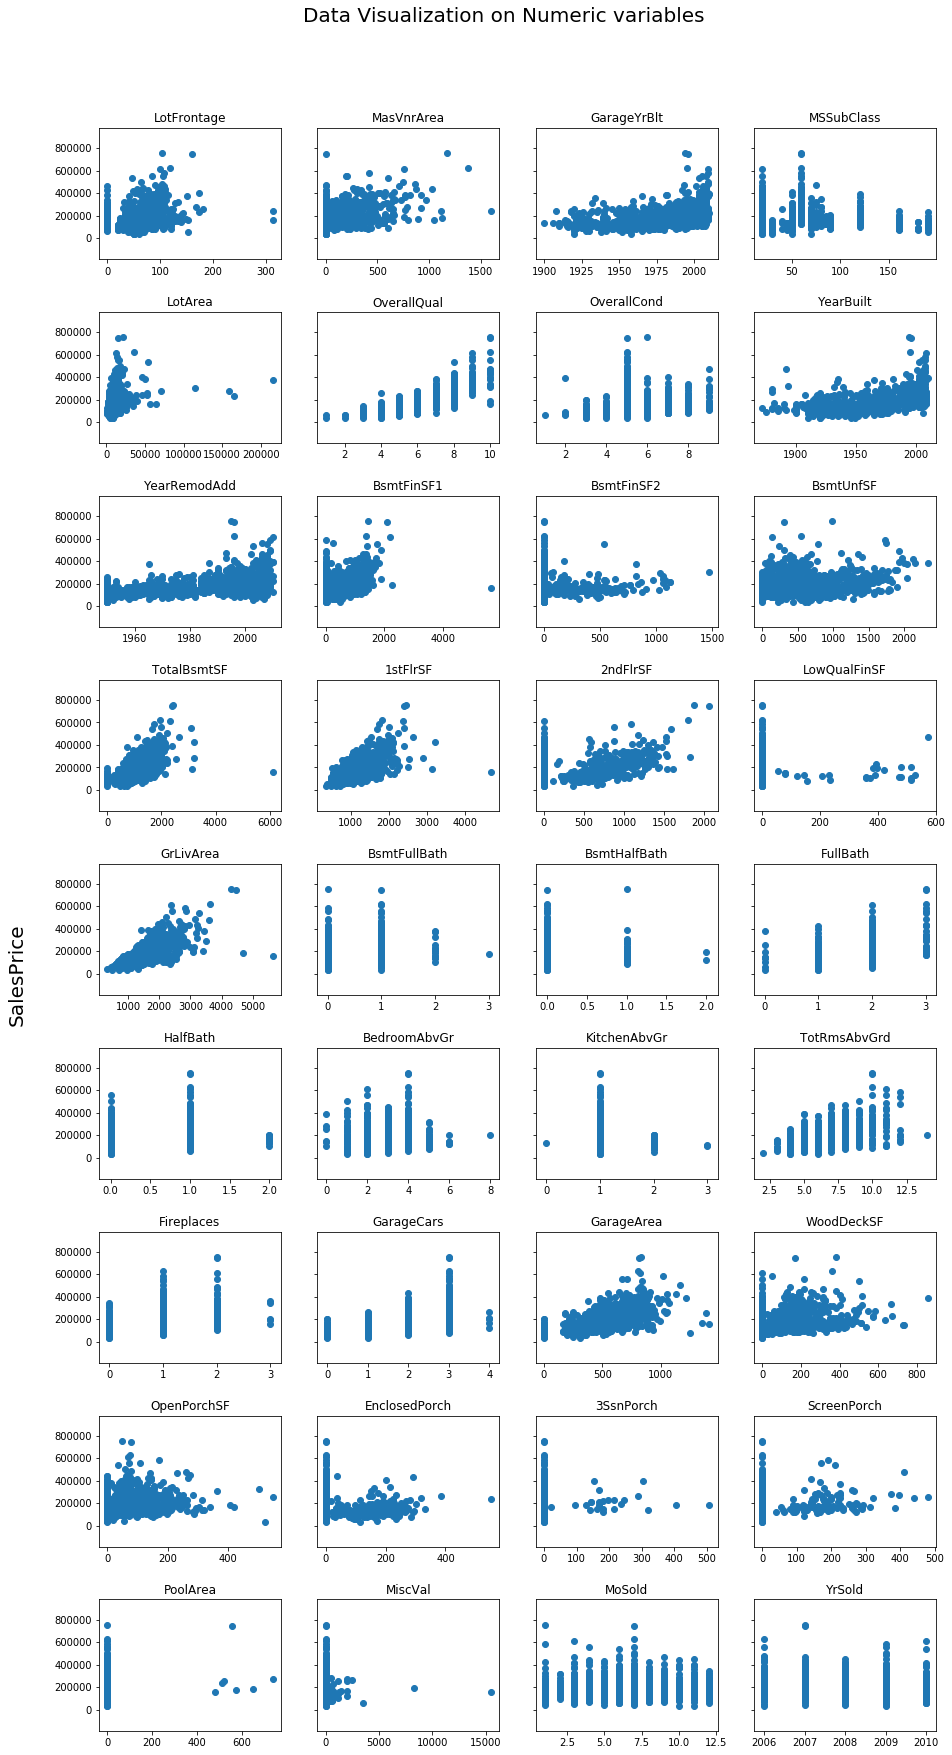

In [16]:
# create a subplot and understand the data visualization on numeric columns
fig, ax = plt.subplots(nrows=9, ncols=4, sharey=True)
#fig.tight_layout()
count = 0
for i in range(0,9):
    for j in range(0,4):
        ax[i][j].scatter(data = housing_df, x=num_lst[count], y="SalePrice")
        ax[i][j].set_title(num_lst[count])
        count = count + 1


fig.set_figwidth(15)
fig.set_figheight(28)

#plt.subplot_tool()  # it shows the parameters, you can adjust them using subplots_adjust
plt.subplots_adjust(top=0.92,hspace=0.4)
#fig.supxlabel("SalesPrice")

fig.text(0.04, 0.5, 'SalesPrice', va='center', rotation='vertical',fontsize=20)

plt.suptitle("Data Visualization on Numeric variables", fontsize=20)
plt.show()

### Below Predictors have high influence in sales price
- OverallQual: Rates the overall material and finish of the house
- YearBuilt: Original construction date
- BsmtFinSF1: Type 1 finished square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageCars: Size of garage in car capacity

### Below Predictors have  very less infulence in sales price ( they have very less data )
- LowQualFinSF: Low quality finished square feet (all floors)
- PoolArea: Pool area in square feet

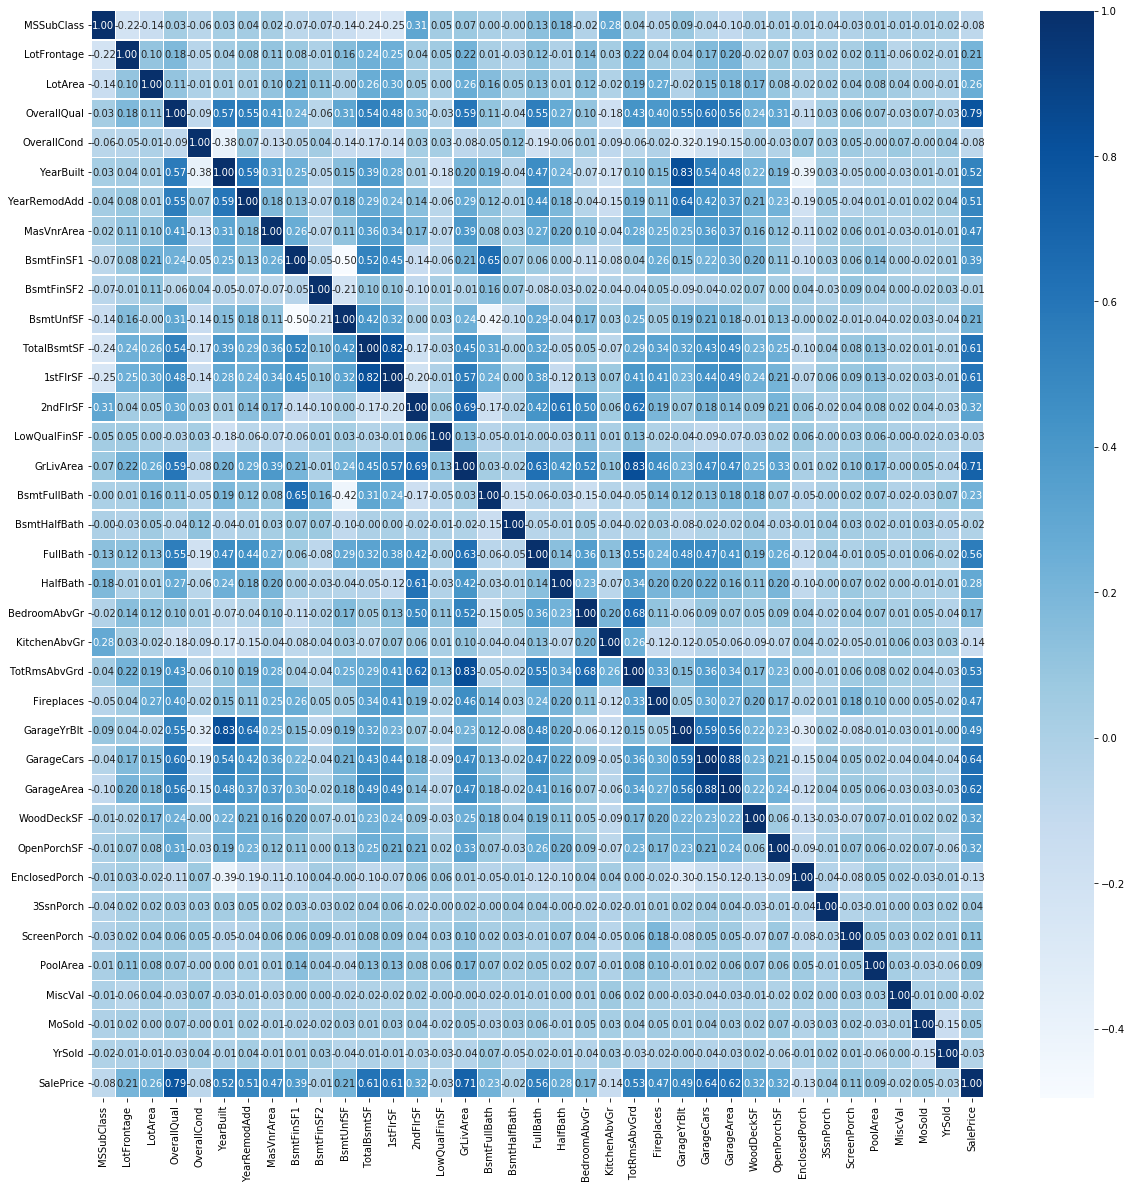

In [17]:
plt.figure(figsize=(20, 20))
col = housing_df.columns.tolist()
col.remove("Id")
sns.heatmap(housing_df[col].corr(), annot=True,cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

In [18]:
obj_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### below are highly correleated
- TotalBsmtSF: Total square feet of basement area vs 1stFlrSF: First Floor square feet 
- GarageYrBlt: Year garage was built vs YearBuilt: Original construction date
- GarageCars vs GargaeArea

### Examine the categorical variable against target variable

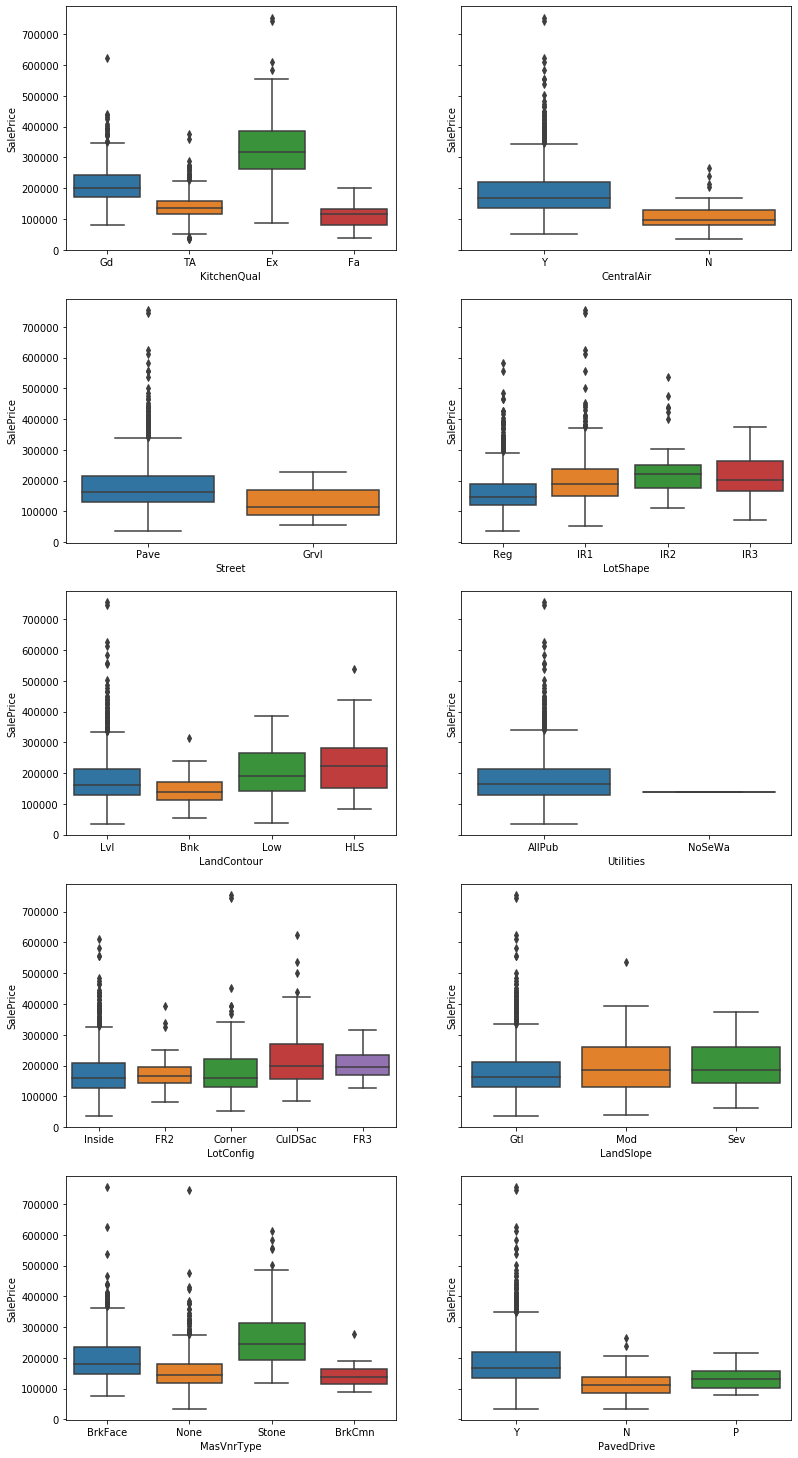

In [19]:
no_of_rows = 5
no_of_cols = 2

fig, axes = plt.subplots(nrows=no_of_rows, ncols=no_of_cols, sharey=True)
cols = ["KitchenQual","CentralAir","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","MasVnrType","PavedDrive"]

count = 0

for i in range(0,no_of_rows):
    for j in range(0,no_of_cols):
        sns.boxplot(x=cols[count], y="SalePrice", data=housing_df, ax=axes[i,j])
        #print(i,j)
        count = count + 1

fig.set_figwidth(13)
fig.set_figheight(26)
        


In [20]:
print(housing_df["Utilities"].value_counts())


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [21]:
def disp_boxplot(col):
    for i in col:
        sns.boxplot(x=housing_df[i], y="SalePrice", data=housing_df)
        plt.show()

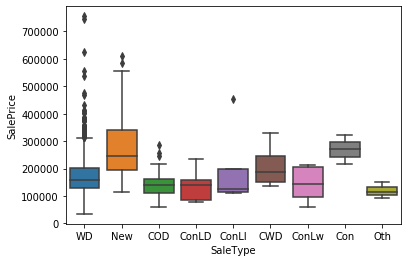

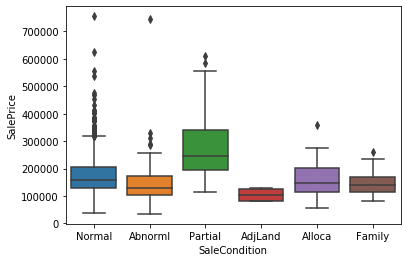

In [22]:
# analysis Sales Data
col =["SaleType","SaleCondition"]
disp_boxplot(col)

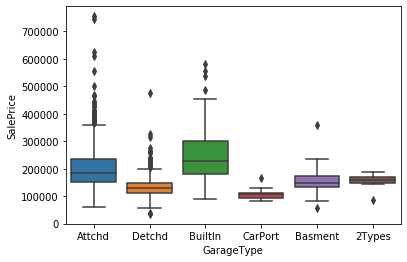

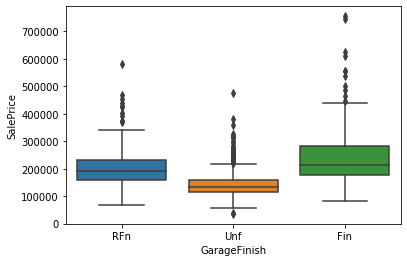

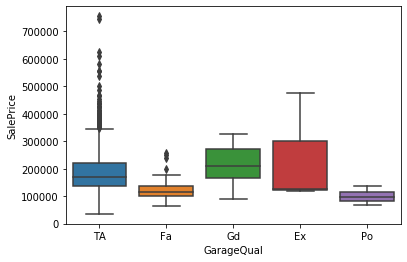

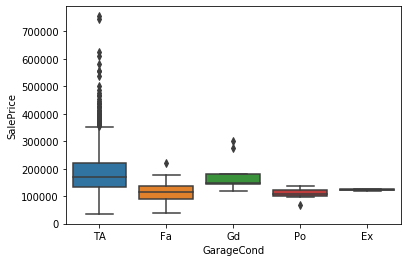

In [23]:
# analysis Garage Data
col=["GarageType","GarageFinish","GarageQual","GarageCond"]
disp_boxplot(col)

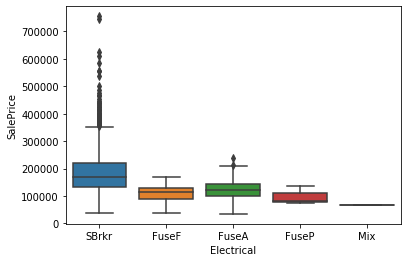

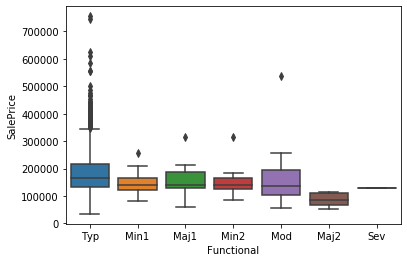

In [24]:
col=["Electrical","Functional"]
disp_boxplot(col)

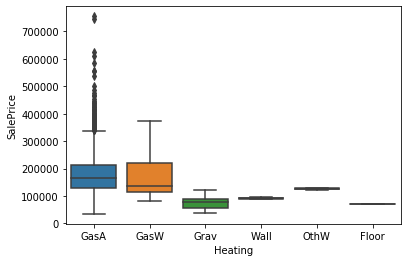

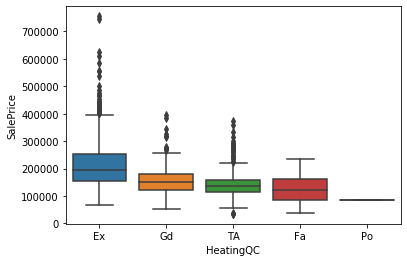

In [25]:
# analysis Heating Data
col =["Heating","HeatingQC"]
disp_boxplot(col)

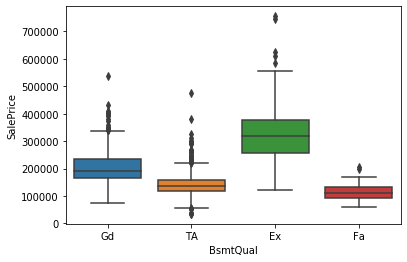

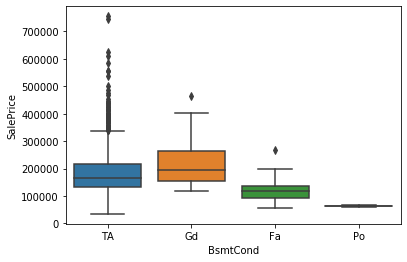

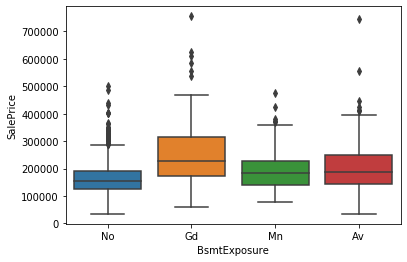

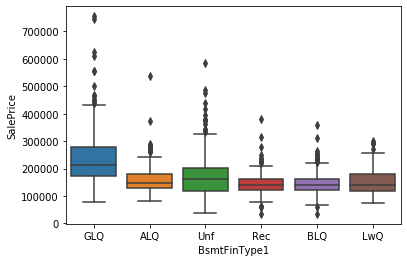

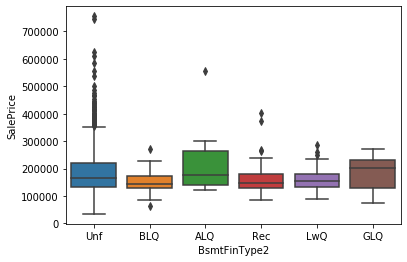

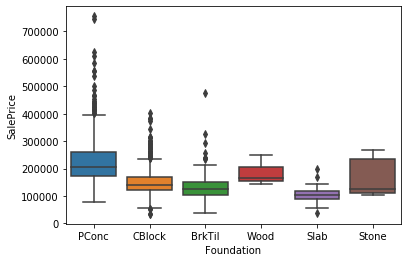

In [26]:
# analysis Basement Data
col=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Foundation"]
disp_boxplot(col)

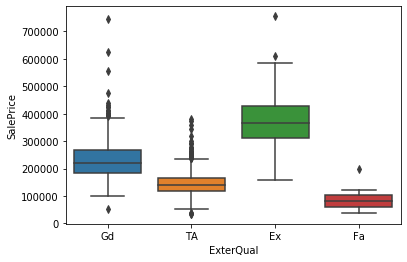

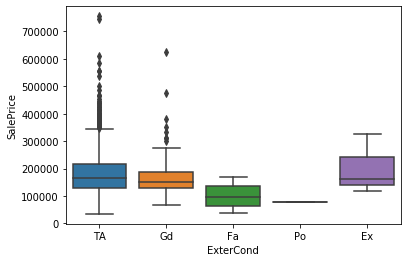

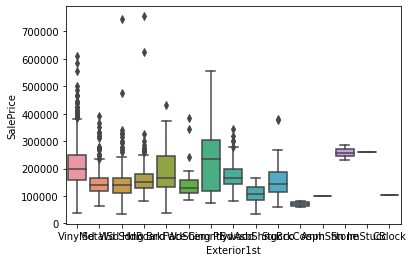

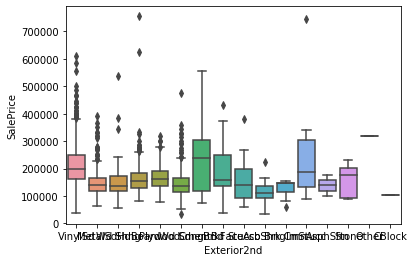

In [27]:
# analsysis Exterior Data
col=["ExterQual","ExterCond","Exterior1st","Exterior2nd"]
disp_boxplot(col)

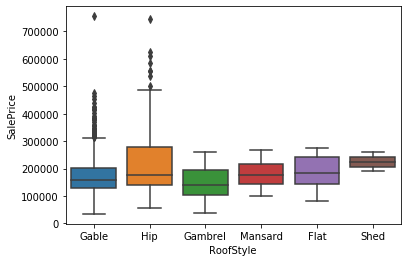

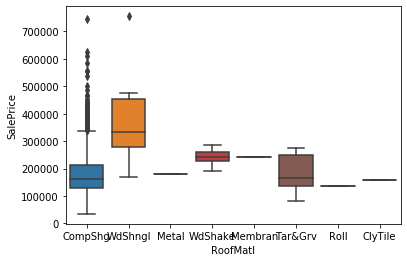

In [28]:
# Analysis roof data
col=["RoofStyle","RoofMatl"]
disp_boxplot(col)

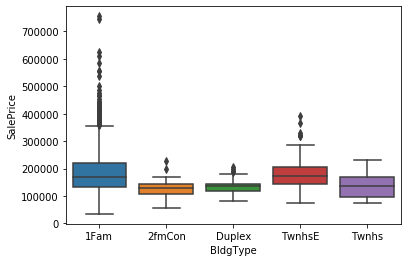

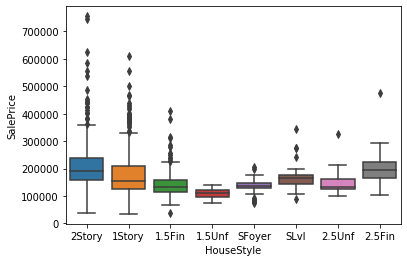

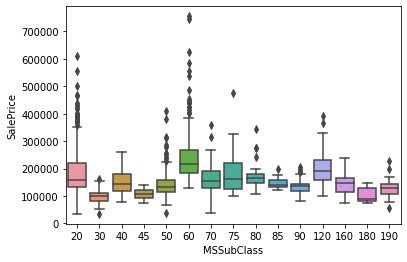

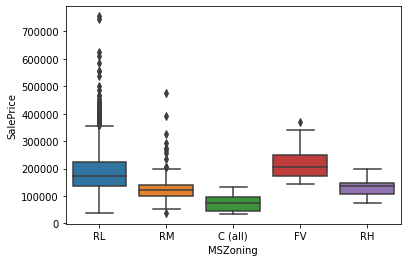

In [29]:
col = ["BldgType","HouseStyle","MSSubClass","MSZoning"]
disp_boxplot(col)

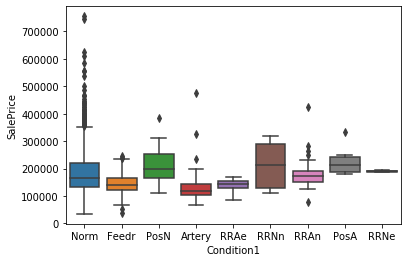

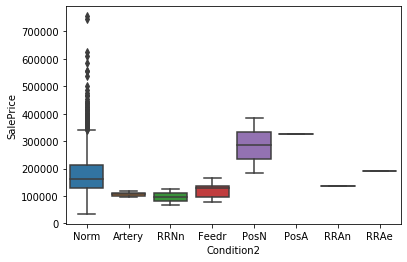

In [30]:
col=["Condition1","Condition2"]
disp_boxplot(col)

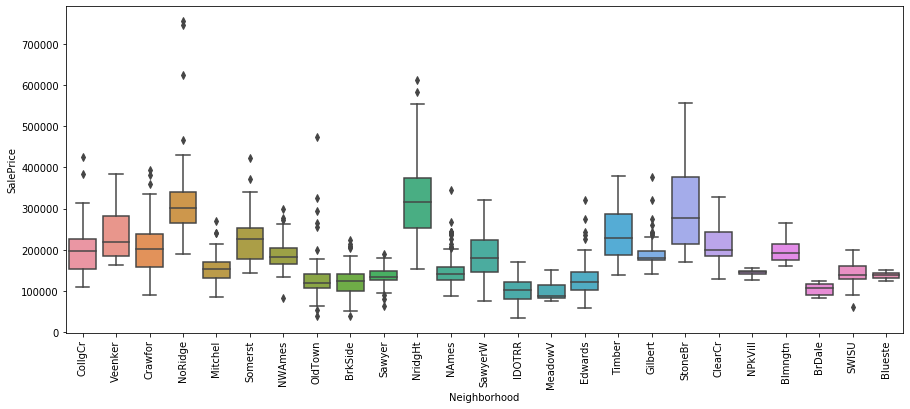

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Neighborhood",y="SalePrice", data=housing_df)
plt.xticks(rotation=90)
plt.show()

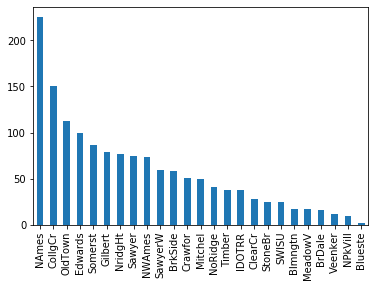

In [32]:
housing_df["Neighborhood"].value_counts().plot(kind="bar")

## Final observation from EDA

## Drop
- Kitchen vs KitchenQual  - both are pretty similar, KitchenQual is comprehensive, so drop KitchenAbvGr
- Utilities column has almost similar value for all rows, hence drop it
- we have very limited data in poolArea vs poolQC, hence dropping poolQC
- GarageQual vs GarageCond represent similar data in different format, drop GarageQual
- GarageCars vs GarageArea represent similar data in different format, drop GarageArea
- GarageYrBlt vs YearBuilt represent similar data in different format, drop GarageYrBlt
- BsmtFinType1 vs BsmtFinType2 represent relative data in different format, so drop BsmtFinType2
- BsmtQual vs BsmtCond represent relative data in different format,so drop BsmtQual
- ExterQual vs ExterCond represents relative data in different format, so drop ExterQual
- Exterior1st vs Exterior2nd, dropping Exterior2nd
- OverallQual vs OverallCond, seems OverallQual has more influence, so dropping OverallCond
- MSSubClass already factored in housing style and year built, so dropping MSSubClass
- Condition1 vs Condition2, Condition1 explains better, so dropping Condition2
- 96% of MiscVal filled as 0, so drop MiscVal and 

## Alter

- MSZoning and OverallQual represented as numeric, but they are acutally categorical, so restruture it.

In [33]:
# drop the non essential or duplicate columns identified
drop_col=["KitchenAbvGr","Utilities","GarageQual","GarageArea","GarageYrBlt","BsmtFinType2","BsmtQual","ExterQual","LowQualFinSF"]
drop_col.extend(["Exterior2nd","OverallCond","MSSubClass","Condition2","Id","MiscVal","Fireplaces","3SsnPorch","PoolArea"])
housing_df.drop(drop_col, axis=1,inplace=True)

In [34]:
# convert OverallQual into real category data
map_dict = {10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",\
            3:"Fair",2:"Poor",1:"Very Poor"}
housing_df["OverallQual"] = housing_df["OverallQual"].map(map_dict)

### Derived Column

In [35]:
# add House Age column
housing_df["House_Age"] = housing_df["YrSold"] - housing_df["YearRemodAdd"]
#housing_df["Sqft_Price"] = housing_df["SalePrice"]/housing_df["LotArea"]

In [36]:
housing_df[["YearBuilt","YearRemodAdd","YrSold","SalePrice","LotArea","House_Age"]].head()

,YearBuilt,YearRemodAdd,YrSold,SalePrice,LotArea,House_Age
0,2003,2003,2008,208500,8450,5
1,1976,1976,2007,181500,9600,31
2,2001,2002,2008,223500,11250,6
3,1915,1970,2006,140000,9550,36
4,2000,2000,2008,250000,14260,8


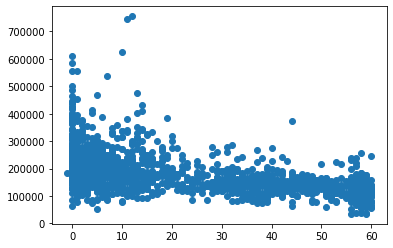

In [37]:
# Age of the house is negatively correlated with sale price
plt.scatter(x="House_Age",y="SalePrice",data=housing_df)
plt.show()

In [38]:
# Drop Time Series Data
housing_df.drop(["MoSold","YrSold","YearBuilt","YearRemodAdd"],axis=1,inplace=True)

In [39]:
housing_df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,House_Age
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,Y,0,61,0,0,WD,Normal,208500,5
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,Y,298,0,0,0,WD,Normal,181500,31
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,Y,0,42,0,0,WD,Normal,223500,6
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,TA,Y,0,35,272,0,WD,Abnorml,140000,36
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,TA,Y,192,84,0,0,WD,Normal,250000,8


In [40]:
float_col = housing_df.select_dtypes(include="float64").columns
int_col = housing_df.select_dtypes(include="int64").columns
obj_col = housing_df.select_dtypes(include="object").columns
print("float_col:",len(float_col))
print("int_col:",len(int_col))
print("obj_col:",len(obj_col))


float_col: 2
int_col: 21
obj_col: 32


In [41]:
# Before create dummies determine which element you are going to drop

for i in obj_col:
    print("=================="+ i + "===============")
    print(housing_df[i].value_counts())
    

==================MSZoning===============
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
==================Street===============
Pave    1454
Grvl       6
Name: Street, dtype: int64
==================LotShape===============
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
==================LandContour===============
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
==================LotConfig===============
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
==================LandSlope===============
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
==================Neighborhood===============
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     4

## One Hot Encoding  (Creating Dummy variables and Binary Variables)

In [42]:
msz_df = pd.get_dummies(housing_df["MSZoning"],drop_first=True)
street_df = pd.get_dummies(housing_df["Street"],drop_first=True)
lotshape_df = pd.get_dummies(housing_df["LotShape"])
landcont_df = pd.get_dummies(housing_df["LandContour"])
lotconfig_df = pd.get_dummies(housing_df["LotConfig"])
landslope_df = pd.get_dummies(housing_df["LandSlope"])
neigh_df = pd.get_dummies(housing_df["Neighborhood"])
cond1_df = pd.get_dummies(housing_df["Condition1"])
bldg_df = pd.get_dummies(housing_df["BldgType"])
hstyle_df = pd.get_dummies(housing_df["HouseStyle"])
ovrql_df = pd.get_dummies(housing_df["OverallQual"])
rf_df = pd.get_dummies(housing_df["RoofStyle"])
rfmt_df = pd.get_dummies(housing_df["RoofMatl"])
ext1_df = pd.get_dummies(housing_df["Exterior1st"])
mas_df = pd.get_dummies(housing_df["MasVnrType"])
extcond_df = pd.get_dummies(housing_df["ExterCond"])
foundation_df = pd.get_dummies(housing_df["Foundation"])
bsmtcon_df = pd.get_dummies(housing_df["BsmtCond"])
bsmtexp_df = pd.get_dummies(housing_df["BsmtExposure"])
bsmtfintyp_df = pd.get_dummies(housing_df["BsmtFinType1"])
heating_df = pd.get_dummies(housing_df["Heating"],drop_first=True)
heatingqc_df = pd.get_dummies(housing_df["HeatingQC"])
air_df = pd.get_dummies(housing_df["CentralAir"],drop_first=True)
ele_df = pd.get_dummies(housing_df["Electrical"])
kitchqual_df = pd.get_dummies(housing_df["KitchenQual"])
fun_df = pd.get_dummies(housing_df["Functional"])
garatyp_df = pd.get_dummies(housing_df["GarageType"],drop_first=True)
garafin_df = pd.get_dummies(housing_df["GarageFinish"])
garacon_df = pd.get_dummies(housing_df["GarageCond"])
pavdriv_df = pd.get_dummies(housing_df["PavedDrive"])
saletyp_df = pd.get_dummies(housing_df["SaleType"])
salecond_df = pd.get_dummies(housing_df["SaleCondition"])

In [43]:
lotshape_df.drop("IR3",axis=1,inplace=True)
landcont_df.drop("Low",axis=1,inplace=True)
lotconfig_df.drop("FR3",axis=1,inplace=True)
landslope_df.drop("Sev",axis=1,inplace=True)
neigh_df.drop("Blueste",axis=1,inplace=True)
cond1_df.drop("RRNe",axis=1,inplace=True)
bldg_df.drop("2fmCon",axis=1,inplace=True)
hstyle_df.drop("2.5Fin",axis=1,inplace=True)
ovrql_df.drop("Very Poor",axis=1,inplace=True)
rf_df.drop("Shed",axis=1,inplace=True)
rfmt_df.drop("Metal",axis=1,inplace=True)
ext1_df.drop("AsphShn",axis=1,inplace=True)
mas_df.drop("None",axis=1,inplace=True)
extcond_df.drop("Po",axis=1,inplace=True)
foundation_df.drop("Wood",axis=1,inplace=True)
bsmtcon_df.drop("Po",axis=1,inplace=True)
bsmtexp_df.drop("No",axis=1,inplace=True)
bsmtfintyp_df.drop("LwQ",axis=1,inplace=True)
heatingqc_df.drop("Po",axis=1,inplace=True)
ele_df.drop("Mix",axis=1,inplace=True)
kitchqual_df.drop("Fa",axis=1,inplace=True)
fun_df.drop("Sev",axis=1,inplace=True)
garafin_df.drop("Unf",axis=1,inplace=True)
garacon_df.drop("Po",axis=1,inplace=True)
pavdriv_df.drop("P",axis=1,inplace=True)
saletyp_df.drop("Oth",axis=1,inplace=True)
salecond_df.drop("AdjLand",axis=1,inplace=True)

In [44]:
# drop the original column
housing_df.drop(obj_col,axis=1,inplace=True)

In [45]:
# collect all dummy df
dummy_lst=[msz_df,street_df,lotshape_df,landcont_df,lotconfig_df,landslope_df,neigh_df,cond1_df,bldg_df,hstyle_df]
dummy_lst.extend([ovrql_df,rf_df,rfmt_df,ext1_df,mas_df,extcond_df,foundation_df,bsmtcon_df,bsmtexp_df,bsmtfintyp_df])
dummy_lst.extend([heating_df,heatingqc_df,air_df,ele_df,kitchqual_df,fun_df,garatyp_df,garafin_df,garacon_df,pavdriv_df])
dummy_lst.extend([saletyp_df,salecond_df])                 

In [46]:
len(dummy_lst)

32

In [47]:
dummy_df = pd.concat(dummy_lst,axis=1)
dummy_df.head()

,FV,RH,RL,RM,Pave,IR1,IR2,Reg,Bnk,HLS,...,ConLD,ConLI,ConLw,New,WD,Abnorml,Alloca,Family,Normal,Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Model Building and Evaluation

In [48]:
housing_final_df = pd.concat([housing_df,dummy_df], axis=1)
scaler_col = housing_df.columns.tolist()
print(len(scaler_col))
print(scaler_col)

23
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'House_Age']


In [49]:
housing_final_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,ConLD,ConLI,ConLw,New,WD,Abnorml,Alloca,Family,Normal,Partial
0,65.0,8450,196.0,706,0,150,856,856,854,1710,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,1786,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,1717,...,0,0,0,0,1,1,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,...,0,0,0,0,1,0,0,0,1,0


In [50]:
housing_final_df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,ConLD,ConLI,ConLw,New,WD,Abnorml,Alloca,Family,Normal,Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,...,0.006164,0.003425,0.003425,0.083562,0.867808,0.069178,0.008219,0.013699,0.820548,0.085616
std,34.664304,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,...,0.078298,0.058440,0.058440,0.276824,0.338815,0.253844,0.090317,0.116277,0.383862,0.279893
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# train test split data
df_train,df_test = train_test_split(housing_final_df, train_size=0.8, random_state=99)

In [52]:
# scaling
scaler = MinMaxScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.fit_transform(df_test[scaler_col])

# split X and y
y_train = df_train.pop("SalePrice")
X_train = df_train

y_test = df_test.pop("SalePrice")
X_test = df_test


In [53]:
# Feature selection using RFE
lr = LinearRegression()
rfe = RFE(lr,24)
rfe.fit(X_train, y_train)
print(X_train.columns[rfe.support_])


Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'GarageCars', 'House_Age', 'FV', 'RH', 'RL', 'RM',
       'NoRidge', 'PosN', 'Excellent', 'Very Excellent', 'Very Good',
       'ClyTile', 'Membran', 'WdShngl', 'ImStucc', 'OthW', 'New', 'Partial'],
      dtype='object')


In [54]:
# calculate R2 score for Train set
y_train_pred=rfe.predict(X_train)

# evaluate the model
train_r2score = r2_score(y_train,y_train_pred)
train_r2score

0.8638448007622601

In [55]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

0.04175573491377805

In [56]:
# calculate R2 score for Test set
y_test_pred = rfe.predict(X_test)

# evaluate the model
test_r2score = r2_score(y_test,y_test_pred)
test_r2score


0.46821585499050933

In [57]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.1205232646835154

# Residual Analysis

In [58]:
res = y_train - y_train_pred

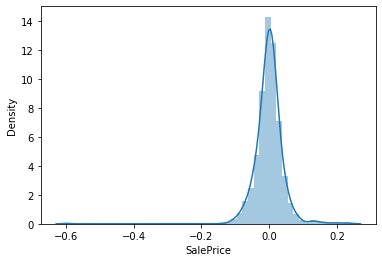

In [59]:
sns.distplot(res)
plt.show()

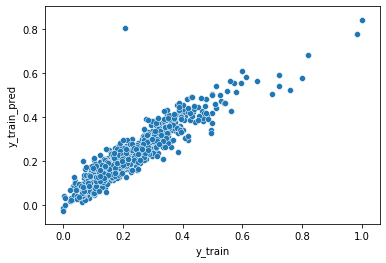

In [60]:
# y_train vs y_train_pred
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

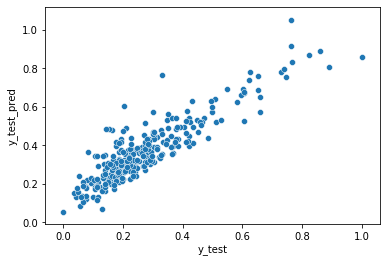

In [61]:
# y_test vs y_test_pred
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

## R2_score value get differed when we change the number of Features
## lets find out the optimal no of featurs

In [62]:
# step 1 : Create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 99)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,26))}]

# step-3: perform grid search
# 3.1 specify model

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [63]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.762024,0.093432,0.003119,0.006238,1,{'n_features_to_select': 1},0.421943,0.386591,0.394373,0.094042,...,0.350438,0.130440,25,0.351806,0.364051,0.361257,0.428353,0.349601,0.371013,0.029185
1,1.437633,0.063401,0.000000,0.000000,2,{'n_features_to_select': 2},0.442788,0.402273,0.397219,0.103779,...,0.357802,0.128477,24,0.408480,0.420315,0.421334,0.468652,0.408350,0.425426,0.022317
2,0.903658,0.158658,0.000322,0.000644,3,{'n_features_to_select': 3},0.459359,0.444553,0.439754,0.159941,...,0.402844,0.124025,23,0.448991,0.453806,0.454982,0.699028,0.437754,0.498912,0.100243
3,0.817639,0.035067,0.000000,0.000000,4,{'n_features_to_select': 4},0.663016,0.694008,0.732648,0.123988,...,0.579754,0.228992,21,0.680172,0.672424,0.661437,0.731423,0.673845,0.683860,0.024535
4,1.179108,0.227961,0.003126,0.006252,5,{'n_features_to_select': 5},0.696807,0.713706,0.764489,0.055951,...,0.586734,0.266465,20,0.707792,0.690274,0.689684,0.744921,0.705191,0.707572,0.020099
5,1.422444,0.051257,0.001618,0.003235,6,{'n_features_to_select': 6},0.710795,0.750063,0.778643,-0.082242,...,0.575007,0.329518,22,0.718895,0.735513,0.700700,0.758704,0.716302,0.726023,0.019721
6,0.845344,0.139904,0.003001,0.006002,7,{'n_features_to_select': 7},0.732234,0.761611,0.775787,-0.094329,...,0.587180,0.341048,19,0.758509,0.747353,0.703643,0.799060,0.750292,0.751771,0.030396
7,0.892708,0.099164,0.000000,0.000000,8,{'n_features_to_select': 8},0.732971,0.806332,0.771628,-0.110390,...,0.594788,0.353354,18,0.769505,0.773510,0.704211,0.800709,0.758584,0.761304,0.031736
8,1.204541,0.288134,0.003304,0.006608,9,{'n_features_to_select': 9},0.733634,0.806898,0.772935,-0.125699,...,0.597715,0.362632,17,0.771055,0.775437,0.704788,0.802448,0.785069,0.767760,0.033281
9,1.335691,0.069531,0.006393,0.007548,10,{'n_features_to_select': 10},0.772137,0.806866,0.753469,-0.131513,...,0.600586,0.366573,16,0.794972,0.776189,0.704788,0.803689,0.787235,0.773375,0.035467


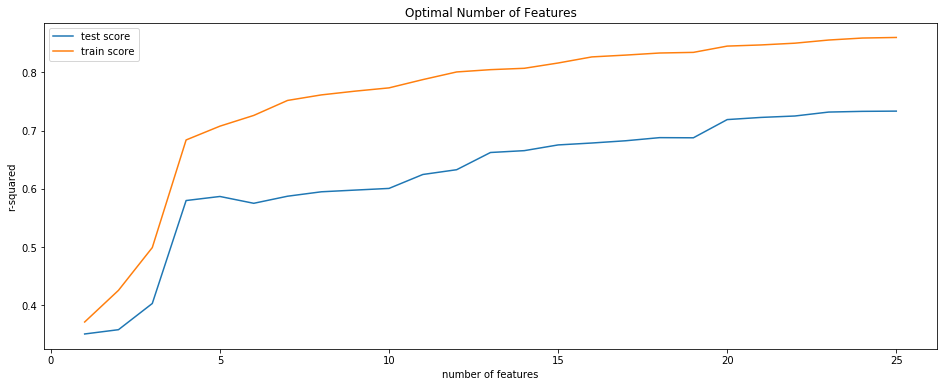

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')



In [65]:
# best params
print(model_cv.best_params_)

{'n_features_to_select': 25}


In [66]:
# best score
model_cv.best_score_

0.7334109713807614

In [67]:
X_train.columns[model_cv.best_estimator_.support_]

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'GarageCars', 'House_Age', 'FV', 'RH', 'RL', 'RM',
       'NoRidge', 'StoneBr', 'PosN', 'Excellent', 'Very Excellent',
       'Very Good', 'ClyTile', 'Membran', 'WdShngl', 'ImStucc', 'OthW', 'New',
       'Partial'],
      dtype='object')

In [68]:
# compare train r2 scroe vs test r2 score
print("Train R2 Score",train_r2score)
print("Test R2 Score",test_r2score)

Train R2 Score 0.8638448007622601
Test R2 Score 0.46821585499050933


## It clearly shows somekind of overfitting lets try Ridge and lasso regression

# Ridge Regression

In [69]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
#ridge.fit(X_train, y_train)

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = "r2",
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [70]:
# print the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 7.0}
0.829945833055094


# Build the model with best alpha

In [71]:
#Fitting Ridge model for alpha = 7 and printing coefficients which have been penalised
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

ridge_df = pd.DataFrame({"columns":X_train.columns, "Coeff":ridge.coef_})
ridge_df = ridge_df.sort_values(by="Coeff", ascending = False)

# top 5 variables predicting the house price as per Ridge
ridge_df.head()


,columns,Coeff
89,Very Excellent,0.074682
9,GrLivArea,0.069367
8,2ndFlrSF,0.064043
15,TotRmsAbvGrd,0.060650
53,NoRidge,0.056818


In [72]:
ridg_ytrain_pred = ridge.predict(X_train)
ridg_ytest_pred = ridge.predict(X_test)

# Important Metrics for Ridge Regression

In [73]:
# calcualte the metrics

print("R2 score of Ridge Train", r2_score(y_train,ridg_ytrain_pred))
print("R2 score of Ridge Test", r2_score(y_test,ridg_ytest_pred))
print("========================================================")
print("RSS of Ridge Train", np.sum(np.square(y_train - ridg_ytrain_pred)))
print("RSS of Ridge Test", np.sum(np.square(y_test - ridg_ytest_pred)))
print("========================================================")
ridg_train_mse = mean_squared_error(y_train,ridg_ytrain_pred)
ridg_test_mse = mean_squared_error(y_test,ridg_ytest_pred)
print("Mean squared Error of Train for Ridge", ridg_train_mse)
print("Mean squared Error of Test for Ridge", ridg_test_mse)
print("========================================================")
print("RMSE of Train for Ridge",ridg_train_mse**0.5)
print("RMSE of Test for Ridge",ridg_test_mse**0.5)


R2 score of Ridge Train 0.8851788704694146
R2 score of Ridge Test 0.8050518965198912
RSS of Ridge Train 1.717365330226838
RSS of Ridge Test 1.55492073696985
Mean squared Error of Train for Ridge 0.0014703470293037995
Mean squared Error of Test for Ridge 0.005325071017020034
RMSE of Train for Ridge 0.03834510437205511
RMSE of Test for Ridge 0.07297308419561306


# Lasso Regression

In [74]:
lasso = Lasso()

# Cross validation
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = "r2",
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

# fit the model
model_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [75]:
# Print the results
print(model_cv.best_params_)
print(model_cv.best_score_)
print(model_cv.best_estimator_)

{'alpha': 0.0001}
0.8252013591661076
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


### Build the model with best alpha

In [76]:
# Build the model with best alpha
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
lasso.coef_

lasso_df = pd.DataFrame({"columns":X_train.columns, "Coeff":lasso.coef_})
lasso_df = lasso_df.sort_values(by="Coeff", ascending = False)

# top 5 variables predicting the house price as per Lasso
lasso_df.head()

,columns,Coeff
9,GrLivArea,0.296101
89,Very Excellent,0.141545
85,Excellent,0.089609
102,WdShngl,0.065289
3,BsmtFinSF1,0.059201


In [77]:
lasso_ytrain_pred = lasso.predict(X_train)
lasso_ytest_pred = lasso.predict(X_test)

# Important Metrics for Lasso Regression

In [78]:
# calcualte the metrics

print("R2 score of lasso Train", r2_score(y_train,lasso_ytrain_pred))
print("R2 score of lasso Test", r2_score(y_test,lasso_ytest_pred))
print("========================================================")
print("RSS of lasso Train", np.sum(np.square(y_train - lasso_ytrain_pred)))
print("RSS of lasso Test", np.sum(np.square(y_test - lasso_ytest_pred)))
print("========================================================")
lasso_train_mse = mean_squared_error(y_train,lasso_ytrain_pred)
lasso_test_mse = mean_squared_error(y_test,lasso_ytest_pred)
print("Mean squared Error of Train for lasso", lasso_train_mse)
print("Mean squared Error of Test for lasso", lasso_test_mse)
print("========================================================")
print("RMSE of Train for lasso",lasso_train_mse**0.5)
print("RMSE of Test for lasso",lasso_test_mse**0.5)

R2 score of lasso Train 0.9048506044611213
R2 score of lasso Test 0.8777973519344571
RSS of lasso Train 1.4231376555739523
RSS of lasso Test 0.9746975128133477
Mean squared Error of Train for lasso 0.001218439773607836
Mean squared Error of Test for lasso 0.0033380051808676293
RMSE of Train for lasso 0.03490615667196599
RMSE of Test for lasso 0.057775472138855165


# Assignment Part-I Conculsion
### these are below significant variables and coefficients found using Lasso Regression

In [79]:
lasso_df.head(35)

,columns,Coeff
9,GrLivArea,0.296101
89,Very Excellent,0.141545
85,Excellent,0.089609
102,WdShngl,0.065289
3,BsmtFinSF1,0.059201
60,StoneBr,0.058950
53,NoRidge,0.057725
6,TotalBsmtSF,0.050894
1,LotArea,0.050378
16,GarageCars,0.046933


# Assignment Part-II

### double the value of alpha for both ridge and lasso

In [80]:
alpha = 7*2
ridge1 = Ridge(alpha=alpha)
ridge1.fit(X_train, y_train)

ridge_df1 = pd.DataFrame({"columns":X_train.columns, "Coeff":ridge1.coef_})
ridge_df1 = ridge_df1.sort_values(by="Coeff", ascending = False)

# top 5 variables predicting the house price as per Ridge
ridge_df1.head()

,columns,Coeff
89,Very Excellent,0.058301
9,GrLivArea,0.056035
15,TotRmsAbvGrd,0.053322
53,NoRidge,0.051101
8,2ndFlrSF,0.050901


In [81]:
# Build the model with best alpha
alpha = 0.0001*2
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train,y_train)

lasso_df1 = pd.DataFrame({"columns":X_train.columns, "Coeff":lasso1.coef_})
lasso_df1 = lasso_df1.sort_values(by="Coeff", ascending = False)

# top 5 variables predicting the house price as per Lasso
lasso_df1.head()

,columns,Coeff
9,GrLivArea,0.325070
89,Very Excellent,0.132622
85,Excellent,0.088968
53,NoRidge,0.058984
60,StoneBr,0.053362


### second top most 5 variables in lasso regression

In [82]:
remove_lst = lasso_df.head()["columns"].tolist()
X_train = X_train.drop(remove_lst,axis=1)

In [83]:
X_test = X_test.drop(remove_lst,axis=1)

In [84]:
# Build the model with best alpha
alpha = 0.0001
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train,y_train)

lasso_df2 = pd.DataFrame({"columns":X_train.columns, "Coeff":lasso2.coef_})
lasso_df2 = lasso_df2.sort_values(by="Coeff", ascending = False)

# top 5 variables predicting the house price as per Lasso
lasso_df2.head()

,columns,Coeff
6,1stFlrSF,0.270273
7,2ndFlrSF,0.147574
5,TotalBsmtSF,0.122767
51,NoRidge,0.064043
58,StoneBr,0.060383
